# 기계학습 (60점)

### 비트코인 데이터

데이터 경로 : './data/bitcoin_mock.csv'

1분간격의 비트코인 가격에 대한 정보이다. 
- datetime: 1분 단위의 데이터
- open : 시작가
- high : 최고가
- low : 최저가
- close : 종가
- volume : 거래량

In [6]:
import pandas as pd

In [7]:
bitcoin_df =pd.read_csv('./bitcoin_mock.csv')
bitcoin_df.head()

,datetime,open,high,low,close,volume
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574
1,2022-01-01 00:01:00,46250.00,46344.23,46234.39,46312.76,42.38106
2,2022-01-01 00:02:00,46312.76,46381.69,46292.75,46368.73,51.29955
3,2022-01-01 00:03:00,46368.73,46391.49,46314.26,46331.08,30.45894
4,2022-01-01 00:04:00,46331.07,46336.10,46300.00,46321.34,20.96029


In [8]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613128 entries, 0 to 613127
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  613128 non-null  object 
 1   open      613115 non-null  float64
 2   high      613128 non-null  float64
 3   low       613128 non-null  float64
 4   close     613106 non-null  float64
 5   volume    613128 non-null  float64
dtypes: float64(5), object(1)
memory usage: 28.1+ MB


### 기계학습1
모든 데이터 행이 1분간격으로 존재하는지 확인하고 그렇지 않은 경우 누락된 시각의 행을 생성하고 컬럼들의 결측치를 적절히 생성하라.      
결측치가 존재한다면 결측치를 처리하라

In [11]:


# Step 1: 'datetime' 컬럼을 datetime 타입으로 변환
# 날짜 및 시간 데이터를 다루기 위해서는 문자열이 아닌 datetime 타입으로 변환이 필요합니다.
bitcoin_df['datetime'] = pd.to_datetime(bitcoin_df['datetime'])

# Step 2: 'datetime'을 DataFrame의 인덱스로 설정
# datetime을 인덱스로 설정하면 시간 기반의 인덱싱 및 리샘플링 작업이 더 효율적으로 수행됩니다.
bitcoin_df.set_index('datetime', inplace=True)

# Step 3: 1분 간격의 전체 날짜 범위 생성
# 데이터의 시작부터 끝까지 1분 간격의 완전한 날짜 범위를 생성합니다.
# 'T'는 1분 간격을 의미합니다.
full_range = pd.date_range(start=bitcoin_df.index.min(), end=bitcoin_df.index.max(), freq='T')

# Step 4: DataFrame을 재인덱싱하여 모든 분(minute)이 포함되도록 함
# 재인덱싱을 통해 모든 분(minute)이 DataFrame에 존재하도록 하며, 
# 누락된 시간대는 NaN 값으로 채워지게 됩니다.
bitcoin_df = bitcoin_df.reindex(full_range)

# Step 5: 'open' 컬럼의 결측값 처리
# 앞의 값으로 결측값을 채웁니다. 이전 값이 존재하지 않는 경우 첫 번째 값부터 결측값이 채워지게 됩니다.
bitcoin_df['open'] = bitcoin_df['open'].ffill()

# Step 6: 'close' 컬럼의 결측값 처리
# 뒤의 값으로 결측값을 채웁니다. 다음 값이 존재하지 않는 경우 마지막 값부터 결측값이 채워지게 됩니다.
bitcoin_df['close'] = bitcoin_df['close'].bfill()

# Step 7: 'high' 및 'low' 컬럼의 결측값 처리
# 'open' 및 'close'와 유사하게 'high'는 앞의 값으로, 'low'는 뒤의 값으로 결측값을 채웁니다.
bitcoin_df['high'] = bitcoin_df['high'].ffill()
bitcoin_df['low'] = bitcoin_df['low'].bfill()

# Step 8: 'volume' 컬럼의 결측값 처리
# 거래량이 기록되지 않은 경우 거래가 없었음을 의미하므로, NaN 값을 0으로 채웁니다.
bitcoin_df['volume'].fillna(0, inplace=True)

# Step 9: 인덱스를 리셋하여 'datetime'을 다시 일반 컬럼으로 변환
# 리샘플링과 결측값 처리가 끝난 후, 인덱스를 리셋하여 'datetime'이 다시 일반 컬럼이 되도록 합니다.
bitcoin_df.reset_index(inplace=True)

# Step 10: 'index' 컬럼을 'datetime'으로 이름 변경
# reset_index() 메서드는 새 'index' 컬럼을 생성하므로, 이를 다시 'datetime'으로 변경합니다.
bitcoin_df.rename(columns={'index': 'datetime'}, inplace=True)

# 처리된 데이터의 첫 몇 줄을 출력합니다.
print(bitcoin_df.head())


             datetime      open      high       low     close    volume
0 2022-01-01 00:00:00  46216.93  46271.08  46208.37  46250.00  40.57574
1 2022-01-01 00:01:00  46250.00  46344.23  46234.39  46312.76  42.38106
2 2022-01-01 00:02:00  46312.76  46381.69  46292.75  46368.73  51.29955
3 2022-01-01 00:03:00  46368.73  46391.49  46314.26  46331.08  30.45894
4 2022-01-01 00:04:00  46331.07  46336.10  46300.00  46321.34  20.96029


In [15]:
# 결측값이 있는지 확인해보자
missing_values = bitcoin_df.isnull().sum()
print(missing_values)

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64


### 기계학습2

t(분)까지 데이터가 확정된 시점에서 매도,매수를 판단하기 위한 알고리즘을 만들고 백테스팅을 진행하려한다.       
아래의 과정의 전처리를 시행하고 algorithm과 result 두 범주형 컬럼의 교차테이블을 출력하라

---
알고리즘
1. t(분)시점에서 t(분)시점과 t-1(분)시점의 5분,120분 이동평균값을 't_5', 't_120'으로 컬럼을 만들어 구한다.
---
2. - t의 5분 이동평균값은 120분 이동평균값보다 높고 t-1의 5분 이동평균값은 120분 이동평균값보다 낮은 경우 : 'buy'   # 매수  
   - t의 5분 이동평균값은 120분 이동평균값보다 낮고 t-1의 5분 이동평균값은 120분 이동평균값보다 높은 경우 : 'sell'  # 매도
   - 그외 'stay'    
   
   위의 조건으로 buy(매수), sell(매도)를 판단하고 buy,sell,stay를 나타내는 새로운 컬럼 'algorithm'을 생성한다.
---         
3. t+10(분)의 open 값과 t(분)의 close값을 비교하여 새로운 컬럼 'result'를 만든다.
   - 여부가 'buy' 이고 t+10(분) open >= t(분) close : 'profit'
   - 여부가 'buy' 이고 t+10(분) open <  t(분) close : 'loss'
   - 여부가 'sell' 이고 t+10(분) open >= t(분) close : 'loss'
   - 여부가 'sell' 이고 t+10(분) open <  t(분) close : 'profit'
   - 여부가 'stay' 이면 : 'stay' 
   
   위의 조건으로 컬럼값을 채운다

In [20]:
import pandas as pd

# Step 1: 데이터 로드 및 datetime 타입으로 변환된 데이터프레임을 사용
# 이전에 처리한 데이터를 기반으로 계속 작업합니다.
# datetime 컬럼이 이미 datetime 타입으로 변환되어 있어야 하며, 인덱스는 리셋된 상태여야 합니다.

# Step 2: 5분 이동평균('t_5')과 120분 이동평균('t_120') 컬럼 생성
# 이동평균은 특정 시간 범위 동안의 평균 값을 구하는 것으로, 가격의 변화 추이를 분석하는 데 사용됩니다.
bitcoin_df['t_5'] = bitcoin_df['close'].rolling(window=5).mean()  # 5분 이동평균
bitcoin_df['t_120'] = bitcoin_df['close'].rolling(window=120).mean()  # 120분 이동평균

# Step 3: t-1 시점의 5분 및 120분 이동평균 값 계산
# t 시점의 값을 구하기 위해서는 t-1 시점의 이동평균도 필요하므로, 이를 별도로 계산합니다.
bitcoin_df['t_5_prev'] = bitcoin_df['t_5'].shift(1)  # 이전(t-1) 시점의 5분 이동평균
bitcoin_df['t_120_prev'] = bitcoin_df['t_120'].shift(1)  # 이전(t-1) 시점의 120분 이동평균

# Step 4: algorithm 컬럼 생성
# 주어진 조건에 따라 매수(buy), 매도(sell), 혹은 유지(stay)를 판단합니다.
def determine_algorithm(row):
    if row['t_5'] > row['t_120'] and row['t_5_prev'] <= row['t_120_prev']:
        return 'buy'
    elif row['t_5'] < row['t_120'] and row['t_5_prev'] >= row['t_120_prev']:
        return 'sell'
    else:
        return 'stay'

# DataFrame에 새로운 'algorithm' 컬럼을 생성하여 위 함수 결과를 저장합니다.
bitcoin_df['algorithm'] = bitcoin_df.apply(determine_algorithm, axis=1)

# Step 5: result 컬럼 생성
# t+10 시점의 open 값과 t 시점의 close 값을 비교하여 결과를 결정합니다.
def determine_result(row):
    future_open = bitcoin_df.loc[row.name + 10, 'open'] if (row.name + 10) in bitcoin_df.index else None
    
    if row['algorithm'] == 'buy':
        if future_open is not None and future_open >= row['close']:
            return 'profit'
        else:
            return 'loss'
    elif row['algorithm'] == 'sell':
        if future_open is not None and future_open < row['close']:
            return 'profit'
        else:
            return 'loss'
    else:
        return 'stay'

# DataFrame에 새로운 'result' 컬럼을 생성하여 위 함수 결과를 저장합니다.
bitcoin_df['result'] = bitcoin_df.apply(determine_result, axis=1)

# Step 6: algorithm과 result 컬럼의 교차 테이블 생성
# 각 범주형 데이터의 분포를 확인하기 위해 교차 테이블을 생성합니다.
cross_tab = pd.crosstab(bitcoin_df['algorithm'], bitcoin_df['result'])

# 교차 테이블 출력
print(cross_tab)


result     loss  profit    stay
algorithm                      
buy        3756    3563       0
sell       3793    3526       0
stay          0       0  598515


In [21]:
bitcoin_df.head()

,datetime,open,high,low,close,volume,t_5,t_120,t_5_prev,t_120_prev,algorithm,result
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574,NaN,NaN,NaN,NaN,stay,stay
1,2022-01-01 00:01:00,46250.00,46344.23,46234.39,46312.76,42.38106,NaN,NaN,NaN,NaN,stay,stay
2,2022-01-01 00:02:00,46312.76,46381.69,46292.75,46368.73,51.29955,NaN,NaN,NaN,NaN,stay,stay
3,2022-01-01 00:03:00,46368.73,46391.49,46314.26,46331.08,30.45894,NaN,NaN,NaN,NaN,stay,stay
4,2022-01-01 00:04:00,46331.07,46336.10,46300.00,46321.34,20.96029,46316.782,NaN,NaN,NaN,stay,stay


### 기계학습3     
위에서 전처리한 데이터에 대해 아래 조건으로 그래프를 출력하라
1. 2022-01-01 08:00:00 ~ 2022-01-01 15:00:00 시간대의 close값의 선형 그래프
2. 위 시간대에 대해 algorithm 컬럼이 buy일 경우 빨간 수직선, sell일 경우 파란 수직선

<img src="./data/1.png" height='300' width='1200' style="float: left; margin-right: 10px;">

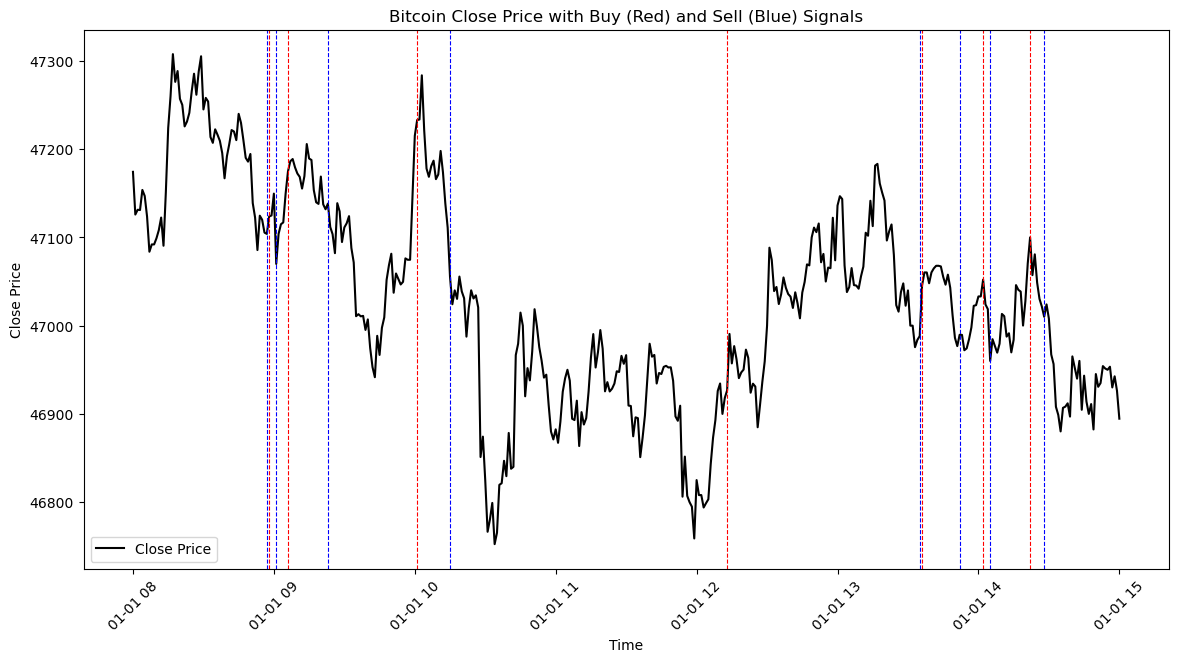

In [22]:
import matplotlib.pyplot as plt

# 필터링할 시간 범위 설정
start_time = "2022-01-01 08:00:00"
end_time = "2022-01-01 15:00:00"

# 지정된 시간 범위 내의 데이터 필터링
filtered_df = bitcoin_df[(bitcoin_df['datetime'] >= start_time) & (bitcoin_df['datetime'] <= end_time)]

# 그래프 초기 설정
plt.figure(figsize=(14, 7))

# close 값의 선형 그래프 그리기
plt.plot(filtered_df['datetime'], filtered_df['close'], label='Close Price', color='black')

# algorithm이 'buy'인 경우 빨간 수직선 그리기
buy_signals = filtered_df[filtered_df['algorithm'] == 'buy']
for idx, row in buy_signals.iterrows():
    plt.axvline(x=row['datetime'], color='red', linestyle='--', lw=0.8)

# algorithm이 'sell'인 경우 파란 수직선 그리기
sell_signals = filtered_df[filtered_df['algorithm'] == 'sell']
for idx, row in sell_signals.iterrows():
    plt.axvline(x=row['datetime'], color='blue', linestyle='--', lw=0.8)

# 그래프 타이틀 및 레이블 설정
plt.title('Bitcoin Close Price with Buy (Red) and Sell (Blue) Signals')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()

# 그래프 출력
plt.show()


### 기계학습4
아래의 정의된 컬럼들로 result의 loss와 profit을 예측하는 모델을 만들려고 한다.

- open
- 시작가,종가 가격차이 (open - close)
- algorithm
- t분과 t-5시점의 close값의 차이 (t , t-5)

2022년 2월 ~ 12월까지의 데이터를 train  2023년 1~2월의 데이터를 평가 데이터로 하고 result의 값이 loss,profit인 데이터만 학습에 사용하여     
랜덤포레스트와 서포트 벡터머신 분류모델을 만들고 test데이터에 대해 accuracy를 비교하라. test데이터에 대한 예측 진행시 profit일 확률이 60%이상인 경우에만 profit으로 예측한다

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [24]:
# loss, profit인 경우만 필터링
filtered_df = bitcoin_df[bitcoin_df['result'].isin(['loss', 'profit'])]

# 필요한 피처들만 선택
filtered_df['price_diff'] = filtered_df['open'] - filtered_df['close']  # 시작가와 종가의 가격 차이
filtered_df['close_diff'] = filtered_df['close'] - filtered_df['close'].shift(5)  # t와 t-5 시점의 close 값 차이

# 결측치 제거 (t-5 시점의 close값 차이로 인해 생긴 결측치)
filtered_df = filtered_df.dropna()

# 사용할 피처와 타겟 변수 정의
X = filtered_df[['open', 'price_diff', 'algorithm', 'close_diff']]
y = filtered_df['result'].apply(lambda x: 1 if x == 'profit' else 0)  # profit: 1, loss: 0

# 범주형 변수를 숫자로 변환
X = pd.get_dummies(X, columns=['algorithm'], drop_first=True)


C:\Users\IBK\AppData\Local\Temp\ipykernel_15860\3912789326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_diff'] = filtered_df['open'] - filtered_df['close']  # 시작가와 종가의 가격 차이
C:\Users\IBK\AppData\Local\Temp\ipykernel_15860\3912789326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['close_diff'] = filtered_df['close'] - filtered_df['close'].shift(5)  # t와 t-5 시점의 close 값 차이


In [26]:
X

,open,price_diff,close_diff,algorithm_sell
211,46838.13,15.70,84.42,False
232,46815.17,1.96,8.35,True
234,46848.29,-15.35,101.87,False
240,46813.21,-35.25,5.99,True
242,46846.05,13.61,23.70,False
...,...,...,...,...
612903,23343.96,-24.27,-7.80,False
612922,23286.43,-10.80,-92.64,True
612926,23315.72,-0.45,-36.37,False
612991,23328.93,9.44,-57.90,True


In [28]:
# loss, profit인 경우만 필터링
filtered_df = bitcoin_df[bitcoin_df['result'].isin(['loss', 'profit'])]

# 필요한 피처들만 선택
filtered_df['price_diff'] = filtered_df['open'] - filtered_df['close']  # 시작가와 종가의 가격 차이
filtered_df['close_diff'] = filtered_df['close'] - filtered_df['close'].shift(5)  # t와 t-5 시점의 close 값 차이

# 결측치 제거 (t-5 시점의 close값 차이로 인해 생긴 결측치)
filtered_df = filtered_df.dropna()

# 사용할 피처와 타겟 변수 정의
X = filtered_df[['open', 'price_diff', 'close_diff', 'algorithm']]
y = filtered_df['result'].apply(lambda x: 1 if x == 'profit' else 0)  # profit: 1, loss: 0

# 범주형 변수를 숫자로 변환 (One-hot encoding)
X = pd.get_dummies(X, columns=['algorithm'], drop_first=True)


C:\Users\IBK\AppData\Local\Temp\ipykernel_15860\1234915141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_diff'] = filtered_df['open'] - filtered_df['close']  # 시작가와 종가의 가격 차이
C:\Users\IBK\AppData\Local\Temp\ipykernel_15860\1234915141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['close_diff'] = filtered_df['close'] - filtered_df['close'].shift(5)  # t와 t-5 시점의 close 값 차이


In [29]:
# Train 데이터: 2022년 2월 ~ 12월
train_data = filtered_df[(filtered_df['datetime'] >= '2022-02-01') & (filtered_df['datetime'] < '2023-01-01')]

# Test 데이터: 2023년 1월 ~ 2월
test_data = filtered_df[(filtered_df['datetime'] >= '2023-01-01') & (filtered_df['datetime'] <= '2023-02-28')]

# Train/Test 데이터로부터 X, y 추출
X_train = X[(filtered_df['datetime'] >= '2022-02-01') & (filtered_df['datetime'] < '2023-01-01')]
y_train = y[(filtered_df['datetime'] >= '2022-02-01') & (filtered_df['datetime'] < '2023-01-01')]

X_test = X[(filtered_df['datetime'] >= '2023-01-01') & (filtered_df['datetime'] <= '2023-02-28')]
y_test = y[(filtered_df['datetime'] >= '2023-01-01') & (filtered_df['datetime'] <= '2023-02-28')]


In [30]:
# 데이터 스케일링 (SVM을 위해 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤포레스트 분류기
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 서포트 벡터 머신 분류기
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

In [31]:
# 랜덤포레스트 예측
rf_predictions = rf_model.predict(X_test)

# SVM 예측 (확률로 계산하여 60% 이상일 때만 profit으로 예측)
svm_probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]  # profit 확률
svm_predictions = np.where(svm_probabilities >= 0.6, 1, 0)

# 정확도 계산
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'SVM Accuracy: {svm_accuracy:.4f}')


Random Forest Accuracy: 0.4922
SVM Accuracy: 0.5214


### 유저의 카드사용 데이터

데이터 출처 :https://www.kaggle.com/datasets/arjunbhasin2013/ccdata     
dataurl ='./data/user_data.csv'

다음은 Credit Card 데이터셋의 데이터 사전 및 각 컬럼의 한글 번역입니다:

1. **CUST_ID**: 신용카드 보유자 식별

2. **BALANCE**: 계좌에 남아 있는 구매 가능 잔액

3. **BALANCE_FREQUENCY**: 잔액 업데이트 빈도, 0과 1 사이의 점수 (1 = 자주 업데이트됨, 0 = 자주 업데이트되지 않음)

4. **PURCHASES**: 계좌에서의 구매 금액

5. **ONEOFF_PURCHASES**: 한 번에 최대 구매 금액

6. **INSTALLMENTS_PURCHASES**: 할부로 구매한 금액

7. **CASH_ADVANCE**: 사용자가 미리 지급한 현금

8. **PURCHASES_FREQUENCY**: 구매 빈도, 0과 1 사이의 점수 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

9. **ONEOFFPURCHASESFREQUENCY**: 일회성 구매 빈도 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

10. **PURCHASESINSTALLMENTSFREQUENCY**: 할부 구매 빈도 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

11. **CASHADVANCEFREQUENCY**: 현금 선지급 빈도 (1 = 자주 선지급함, 0 = 자주 선지급하지 않음)

12. **CASHADVANCETRX**: 현금 선지급으로 이루어진 거래 수

13. **PURCHASES_TRX**: 구매 거래 수

14. **CREDIT_LIMIT**: 사용자 신용카드의 한도

15. **PAYMENTS**: 사용자가 지불한 금액

16. **MINIMUM_PAYMENTS**: 사용자가 지불한 최소 금액

17. **PRCFULLPAYMENT**: 사용자가 지불한 전체 금액의 백분율

18. **TENURE**: 신용카드 서비스 사용 기간

In [37]:
import pandas as pd
data = pd.read_csv('./user_data.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 기계학습
데이터 EDA를 실시하고 결측치와 이상치를 처리하라 (시각화 포함)

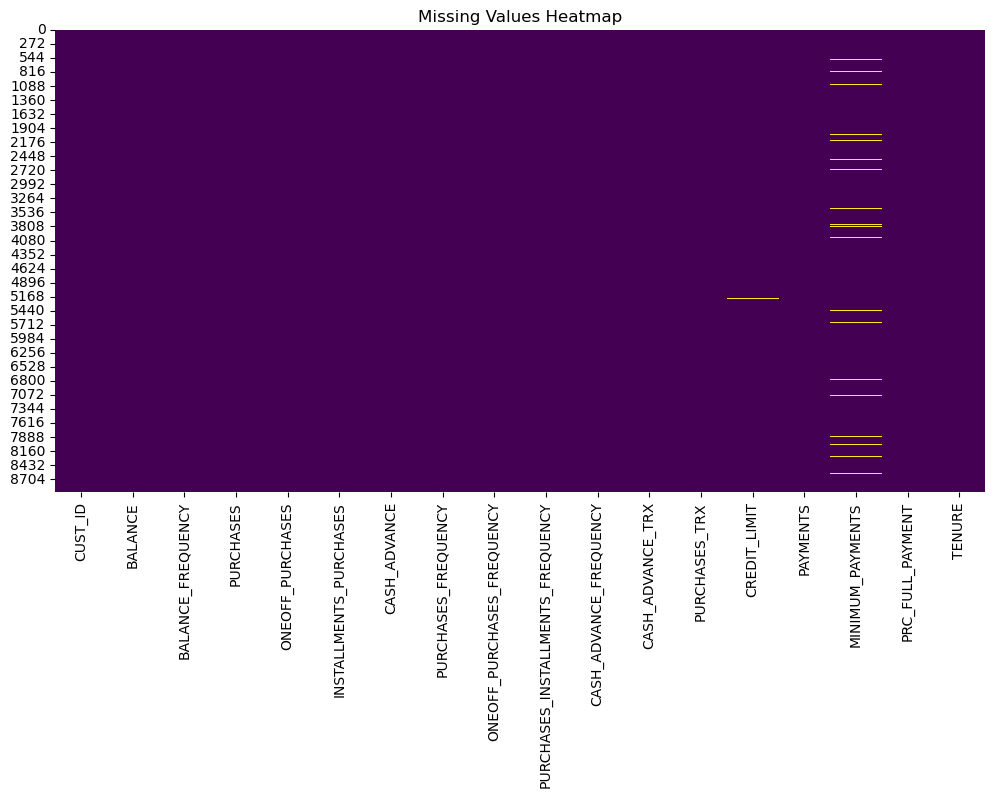

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 결측치 처리
# CREDIT_LIMIT: 1개의 결측치는 평균으로 대체
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# MINIMUM_PAYMENTS: 결측치는 평균으로 대체
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)


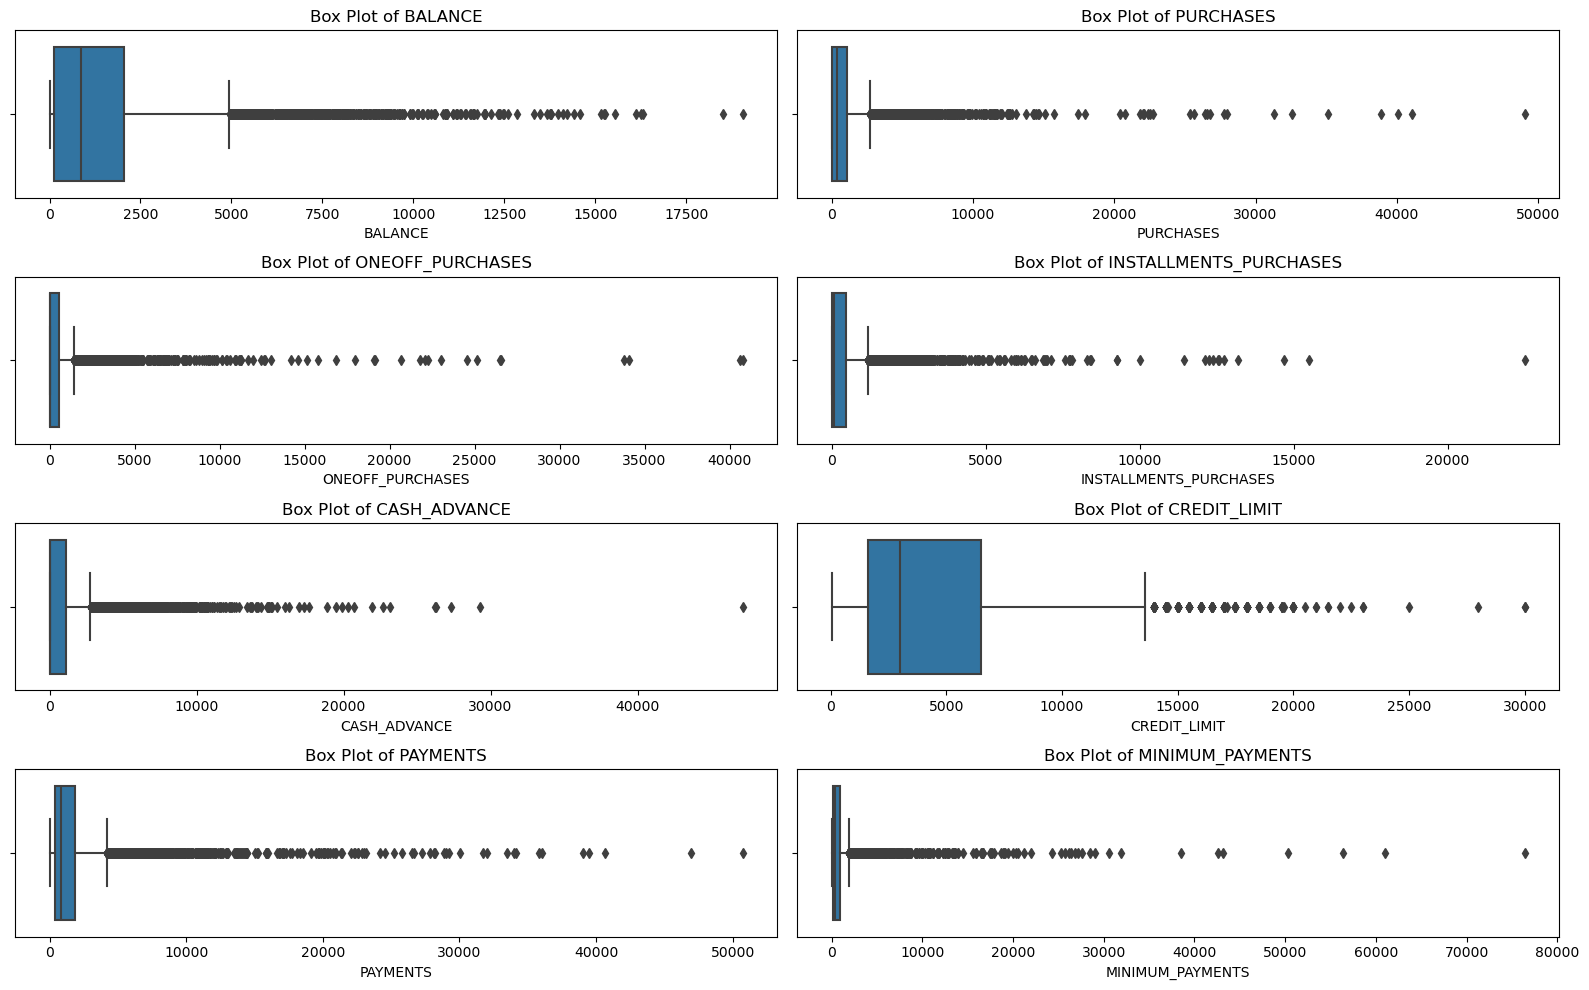

In [39]:
# 이상치 시각화: 주요 수치형 변수들에 대해 Box plot 생성
plt.figure(figsize=(16, 10))

# 주요 수치형 변수 선택
columns_to_plot = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
#
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [40]:
# IQR을 사용하여 이상치 제거 함수 정의
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 이상치 제거 적용
for column in columns_to_plot:
    data = remove_outliers(data, column)


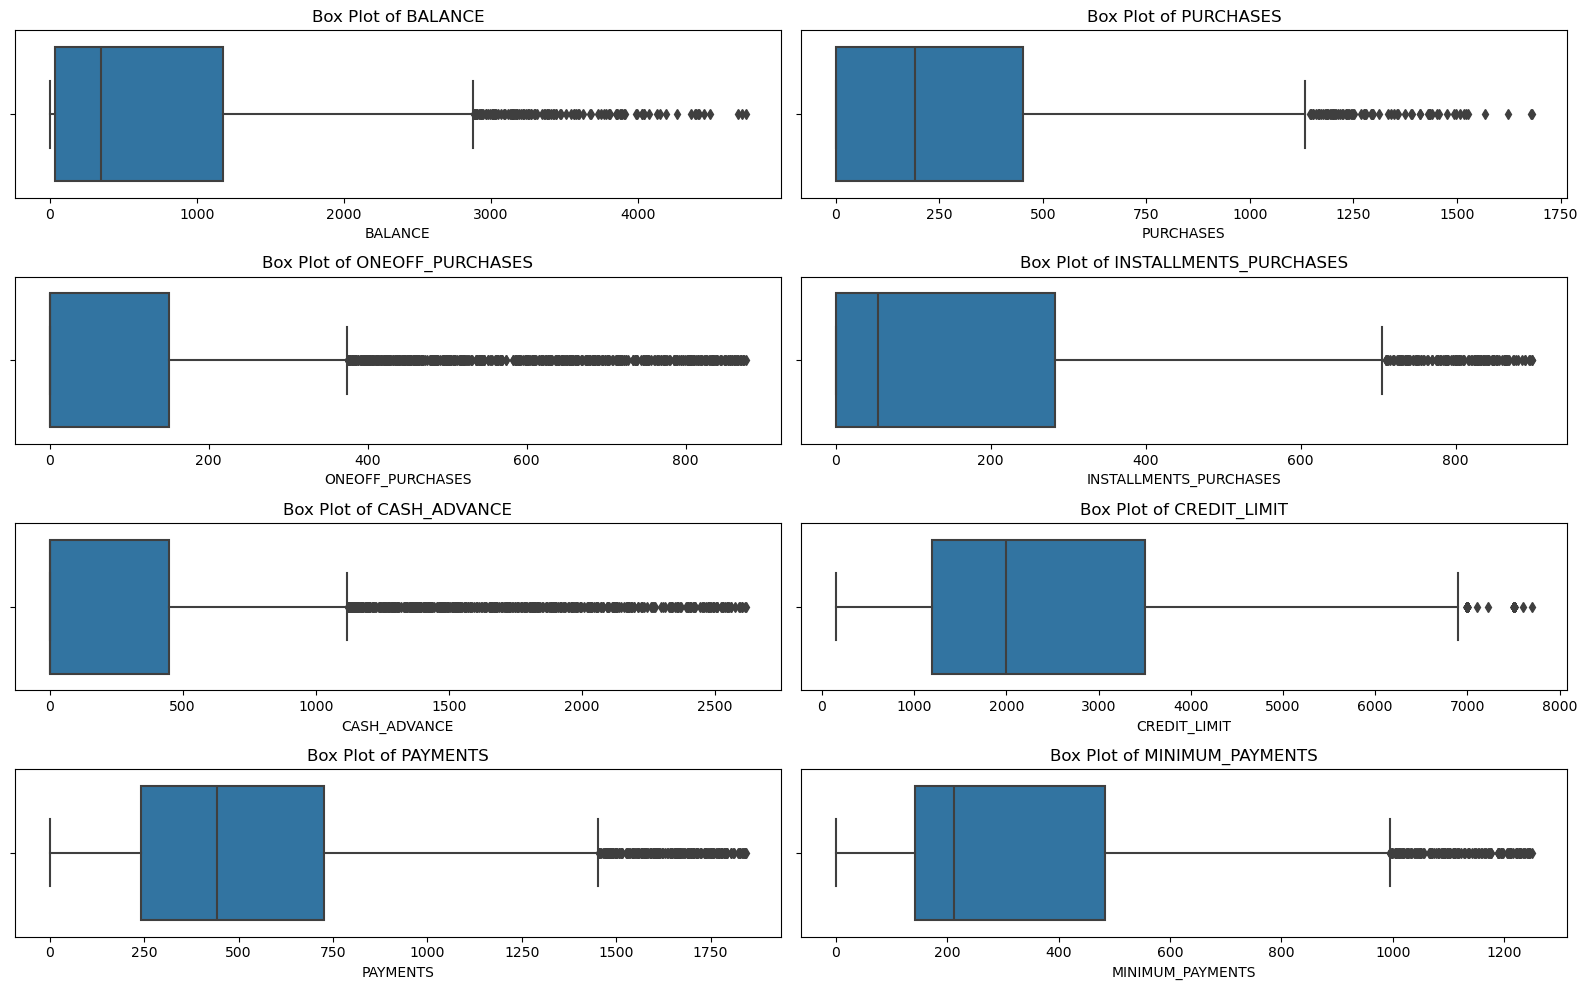

In [41]:
# 다시 이상치 시각화: 주요 수치형 변수들에 대해 Box plot 생성
plt.figure(figsize=(16, 10))

# 주요 수치형 변수 선택
columns_to_plot = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 4416 entries, 0 to 8948
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4416 non-null   object 
 1   BALANCE                           4416 non-null   float64
 2   BALANCE_FREQUENCY                 4416 non-null   float64
 3   PURCHASES                         4416 non-null   float64
 4   ONEOFF_PURCHASES                  4416 non-null   float64
 5   INSTALLMENTS_PURCHASES            4416 non-null   float64
 6   CASH_ADVANCE                      4416 non-null   float64
 7   PURCHASES_FREQUENCY               4416 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4416 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4416 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4416 non-null   float64
 11  CASH_ADVANCE_TRX                  4416 non-null   int64  
 12  PURCHASES_T

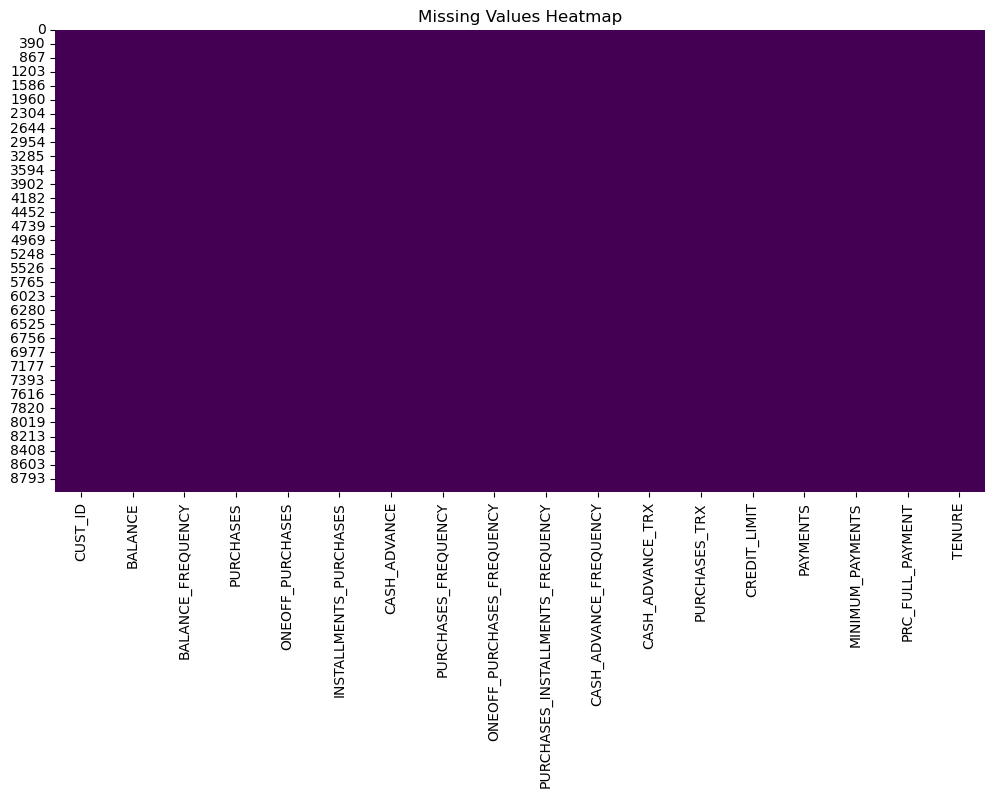

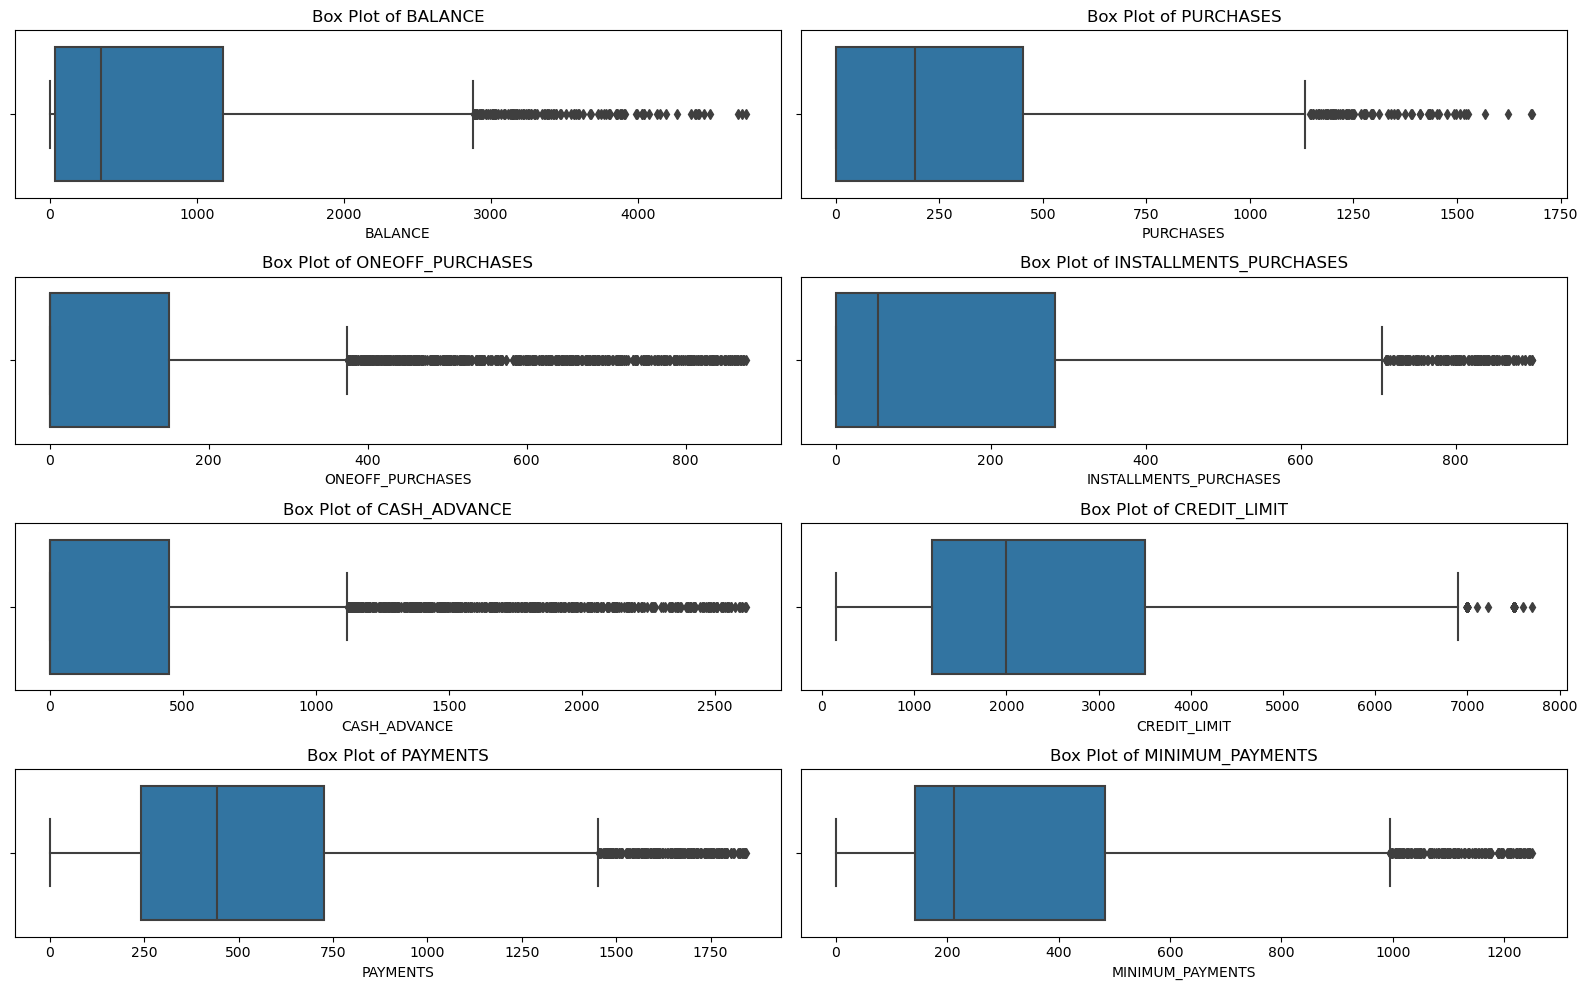

In [42]:


# 데이터 정보 확인
data.info()

# 데이터의 첫 5개 행 확인
data.head()

# Step 2: 결측치 시각화 및 처리
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 결측치 처리
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

# Step 3: 이상치 탐지 및 처리
plt.figure(figsize=(16, 10))

columns_to_plot = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# IQR을 사용하여 이상치 제거
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in columns_to_plot:
    data = remove_outliers(data, column)


### 기계학습6     
PCA를 통해 적절한 차원으로 데이터를 축소하고 평가하라

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 사용할 피처들을 선택
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# 데이터에서 피처 추출
X = data[features]
y = data['TENURE']  # 예시로 'TENURE' 사용, 실제로는 타겟 변수를 사용할 것

# 데이터를 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


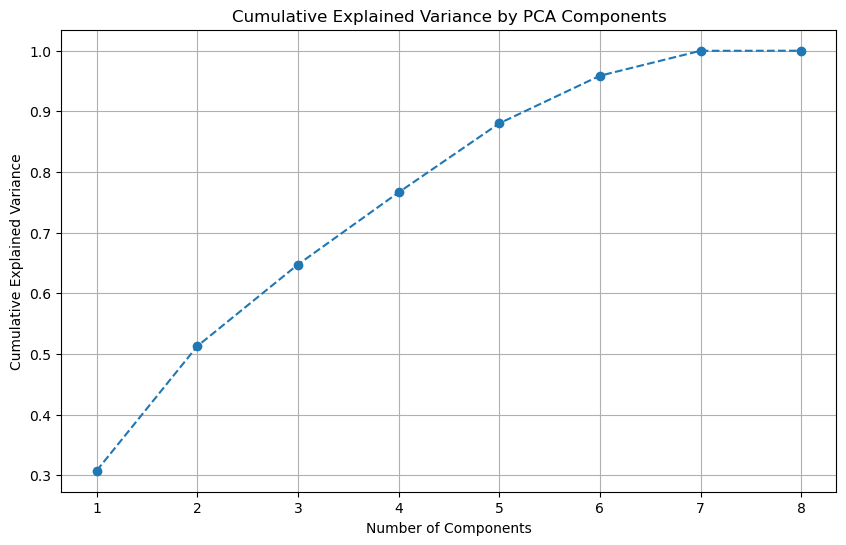

In [44]:
# PCA 모델 초기화
pca = PCA()

# PCA 적용하여 주성분 계산
X_pca = pca.fit_transform(X_scaled)

# 각 주성분이 설명하는 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명 분산 비율 계산
cumulative_variance = explained_variance_ratio.cumsum()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [45]:
# 95% 이상의 분산을 설명하는 주성분의 수를 선택
pca = PCA(n_components=0.95)
X_pca_reduced = pca.fit_transform(X_scaled)

# 선택된 주성분의 수
n_components = pca.n_components_
print(f"Selected number of components: {n_components}")


Selected number of components: 6


In [46]:
# Train/Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.3, random_state=42)

# 랜덤포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy after PCA: {accuracy:.4f}")


Model accuracy after PCA: 0.8070


결론
PCA를 통해 데이터의 차원을 축소하여 모델의 학습 속도를 높이고, 과적합을 방지할 수 있습니다.
선택된 주성분의 수는 누적 설명 분산 비율을 기준으로 결정하며, 보통 95% 이상의 분산을 설명하는 주성분을 선택합니다.
차원 축소 후에도 모델이 높은 정확도를 유지하는지 평가하여 PCA 적용의 효과를 판단합니다.

### 기계학습7     
위의 차원 축소된 데이터를 바탕으로 KMeans 클러스터링을 실시하라.     
응집도와 분리도를 기반으로 적절 클러스터 숫자를 구하고 두개의 주성분 차원에 군집 중심을 포함하여 시각화하라

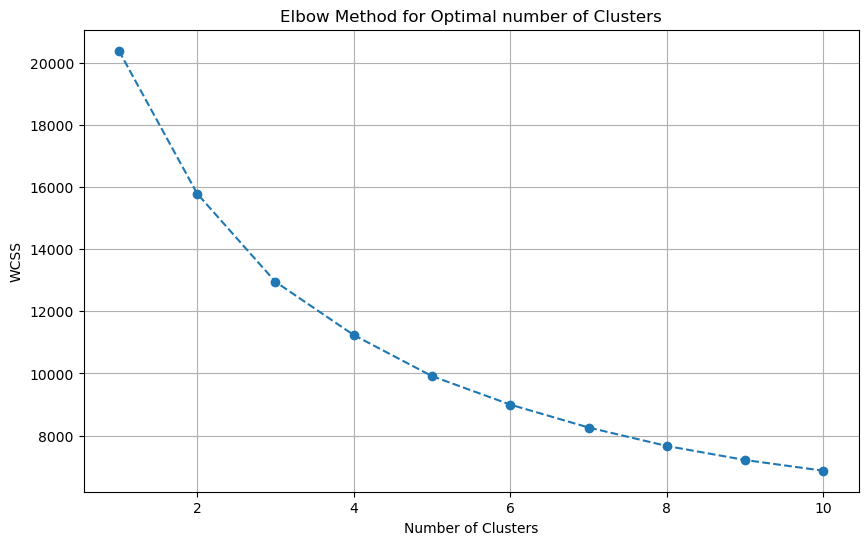

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 엘보우 방법을 사용하여 적절한 클러스터 수 찾기
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca_reduced)
    wcss.append(kmeans.inertia_)  # 응집도(WCSS)를 저장

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [49]:
# 최적의 클러스터 수 결정 (예: 3으로 가정)
optimal_clusters = 3

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_pca_reduced)

# 클러스터링 결과
clusters = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


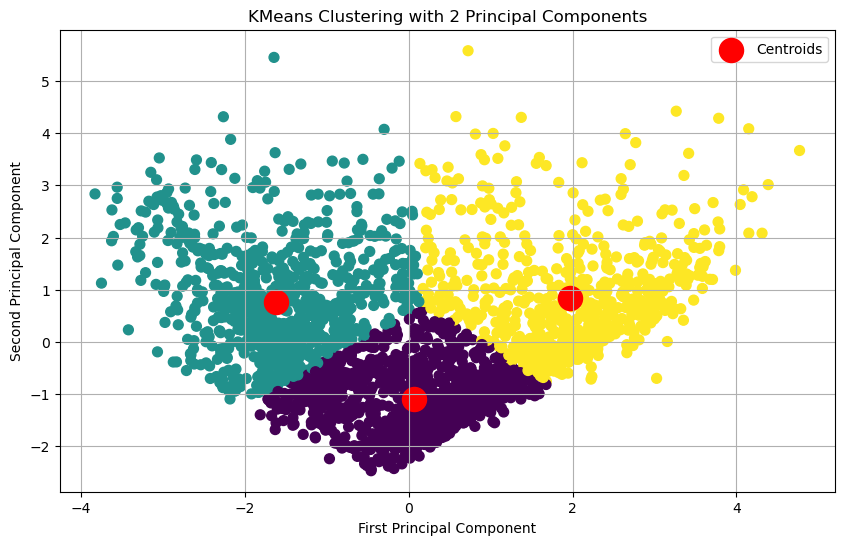

In [50]:
import numpy as np

# PCA로 두 개의 주성분으로 차원 축소
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# KMeans 클러스터링 수행 (2D 데이터에 대해)
kmeans_2d = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_2d.fit(X_pca_2d)

# 클러스터링 결과
clusters_2d = kmeans_2d.labels_
cluster_centers_2d = kmeans_2d.cluster_centers_

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters_2d, s=50, cmap='viridis')
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering with 2 Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid()
plt.show()


### 기계학습8   
마케팅 담당자인 당신은 KMeans 군집 결과를 통해 각 군집 특성을 파악하고 군집별 프로모션 전략을 서술하라
    

In [52]:
# 숫자 데이터만 선택
numeric_columns = data.select_dtypes(include=[np.number]).columns

# 군집별로 데이터를 그룹화하고, 숫자 열들의 평균값을 계산
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
cluster_summary


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
Cluster,,,,,,,,,,,,,,,,,,
0,123.476371,0.670337,144.250949,40.914124,103.336825,30.466775,0.438535,0.055583,0.362502,0.022577,0.323555,5.496980,2213.644909,234.370140,216.978489,0.195028,11.202761,0.0
1,1204.110444,0.933706,64.218531,32.831009,31.462635,384.873209,0.135304,0.042378,0.091198,0.170202,2.937220,1.965247,1833.015695,476.556401,449.314441,0.010261,11.530269,1.0
2,277.455782,0.853146,492.005660,43.206353,450.113630,36.437515,0.799477,0.039636,0.746105,0.015146,0.227723,13.460396,2252.117712,530.802899,228.346867,0.321014,11.473597,2.0


### 군집 분석 결과 해석 및 인사이트 도출

KMeans 군집 분석을 통해 고객 데이터를 3개의 주요 군집으로 나눴습니다. 각 군집의 특성을 파악하고, 이를 바탕으로 군집별 프로모션 전략을 도출할 수 있습니다.

#### 1. **군집 0: 고액 소비자 군집**
   - **특성**:
     - `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`, `PAYMENTS` 등의 재정 관련 변수에서 가장 높은 평균값을 보입니다.
     - 이 군집에 속한 고객은 카드 한도가 높고, 높은 지출을 하며, 정기적인 결제도 많습니다.
     - `ONEOFF_PURCHASES` (일회성 구매)와 `INSTALLMENTS_PURCHASES` (할부 구매)의 금액도 높아, 다양한 방식으로 큰 금액을 지출하는 경향이 있습니다.
   - **프로모션 전략**:
     - **프리미엄 혜택 제공**: 이 군집의 고객은 고액 소비자이므로, 프리미엄 서비스(예: 공항 라운지 이용, VIP 이벤트 초대, 고급 리조트 할인)를 제공하여 충성도를 강화할 수 있습니다.
     - **맞춤형 리워드 프로그램**: 고액 소비에 대한 보상으로 맞춤형 리워드(예: 특정 카테고리에서 높은 캐시백)를 제공하여, 더 많은 지출을 유도할 수 있습니다.
     - **개인화된 서비스**: 고객의 구매 패턴을 분석하여 개인화된 추천 서비스와 맞춤형 혜택을 제공함으로써, 고객 만족도를 높이고, 지속적인 사용을 유도할 수 있습니다.

#### 2. **군집 1: 중간 소비자 군집**
   - **특성**:
     - `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`, `PAYMENTS` 등의 지표에서 중간 수준을 보입니다.
     - 이 군집의 고객은 상대적으로 평범한 카드 사용 패턴을 보이며, 적정 수준의 지출을 하고 있습니다.
     - 주로 소액 할부 구매를 사용하는 경향이 있으며, 일회성 구매보다는 정기적인 구매 패턴이 더 두드러집니다.
   - **프로모션 전략**:
     - **소셜 미디어 및 이메일 캠페인**: 이 군집은 적절한 수준의 소비를 하고 있기 때문에, 할인 혜택과 새로운 상품 정보를 제공하여 추가적인 구매를 유도할 수 있습니다.
     - **할인 쿠폰 및 혜택 제공**: 특정 카테고리에서의 할인 쿠폰을 제공하여, 이 군집의 고객이 더 많은 구매를 할 수 있도록 유도합니다.
     - **적립형 리워드 프로그램**: 이 군집의 고객에게는 일정 금액 이상 구매 시 적립금을 제공하거나, 자주 사용하는 특정 상점에서의 할인을 제안할 수 있습니다.

#### 3. **군집 2: 저액 소비자 군집**
   - **특성**:
     - `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`, `PAYMENTS` 등이 낮은 수준을 보입니다.
     - 이 군집에 속한 고객은 카드 사용 빈도가 낮고, 지출도 적습니다.
     - 주로 소액 구매를 하며, 카드 한도도 낮아 고가 상품 구매보다는 소규모 소비에 초점을 맞추고 있습니다.
   - **프로모션 전략**:
     - **기본 혜택 강화**: 이 군집의 고객에게 무이자 할부, 기초 생활용품 할인 등의 기본적인 혜택을 강화하여 카드 사용 빈도를 높일 수 있습니다.
     - **리텐션 프로그램**: 고객 이탈을 방지하기 위해 포인트 적립 및 사용의 편리성을 강조한 리텐션 프로그램을 도입하여, 고객이 더 자주 카드를 사용하도록 유도합니다.
     - **저비용 고효율 혜택 제공**: 작은 지출에 대해서도 혜택을 제공하여, 고객이 카드 사용을 습관화할 수 있도록 유도합니다. 예를 들어, 소액 결제 시 소정의 포인트를 적립하거나, 특정 금액 이하의 결제 시 할인 혜택을 제공할 수 있습니다.

### 인사이트 도출
- **고액 소비자 군집(군집 0)**은 매우 가치 있는 고객층으로, 이들을 대상으로 하는 프리미엄 서비스와 맞춤형 혜택이 중요합니다. 이들은 높은 지출을 통해 큰 수익을 창출할 수 있으므로, 개인화된 서비스와 혜택을 제공하여 이들의 충성도를 강화할 필요가 있습니다.
- **중간 소비자 군집(군집 1)**은 적절한 수준의 소비를 하는 고객층으로, 이들을 대상으로 하는 일반적인 마케팅 캠페인(예: 할인 쿠폰, 적립형 리워드)이 효과적일 것입니다. 이들은 소액 할부 구매를 자주 사용하므로, 이에 대한 추가 혜택을 제공하여 소비를 촉진할 수 있습니다.
- **저액 소비자 군집(군집 2)**은 카드 사용이 적은 고객층으로, 이들을 대상으로 하는 마케팅 전략은 카드 사용 빈도를 높이는 데 초점을 맞춰야 합니다. 기본 혜택을 강화하고, 작은 소비에도 혜택을 제공하여 이들의 카드 사용을 유도할 필요가 있습니다.

### 결론
군집 분석 결과, 각 군집의 특성을 이해하고 이에 맞는 마케팅 전략을 세울 수 있습니다. 이를 통해 고객 만족도를 높이고, 각 군집의 특성에 맞는 최적화된 프로모션을 통해 매출을 극대화할 수 있습니다.

### 기계학습9
병합적 계층군집을 실시하고 덴드로그램을 시각화하라. 군집간 거리는 ward 방식으로 업데이트하며 위 문제에서 구한 최적 군집이 만들어지 지기 위한 거리 범위를 구하라

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비 (이전에 PCA로 차원 축소된 데이터를 사용)
X_pca_reduced = X_pca_reduced  # 이미 PCA로 축소된 데이터 사용


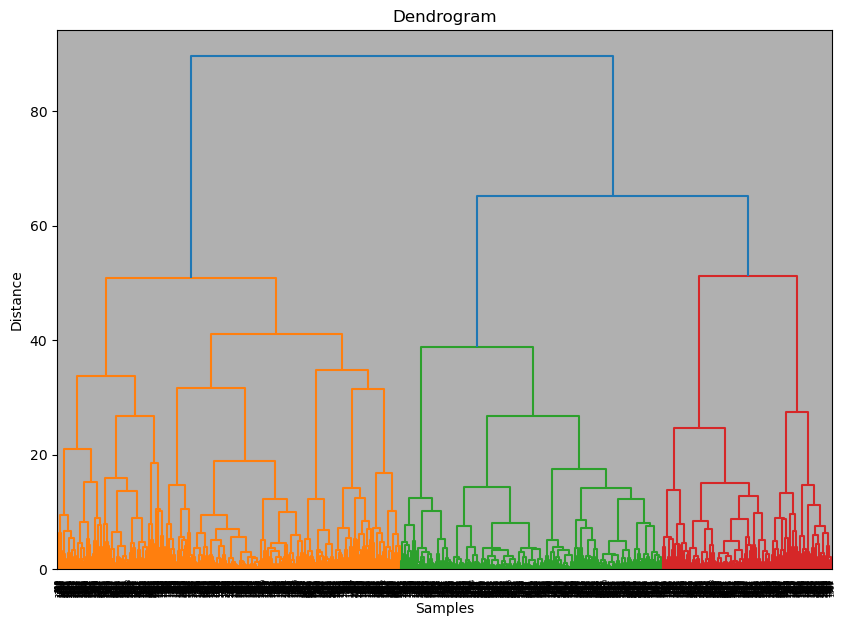

In [54]:
# 계층 군집 실행 (ward 방법 사용)
linked = linkage(X_pca_reduced, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


### 덴드로그램의 특정 위치에서 군집을 형성하기 위한 거리 찾기
#### 수평선을 자를 위치를 직접 설정하거나, 눈으로 확인하여 거리 값을 유추할 수 있습니다.


### 통계1      
어느 자동차 회사의 본사에서 여러 지방 영업소에 내려보낸 43대의 새 차 중 11대에 불량 오디오가 설치되었다고 한다. 어느 영업소가 8대를 인수하였는데 이 중에서 오디오가 불량인 차가 적어도 2대 이상이 될 확률을 구하라.

In [57]:
from scipy.stats import binom

# 성공 확률 (불량 오디오일 확률)
p = 11 / 43

# 총 인수한 차량 수
n = 8

# X = 0 또는 X = 1일 확률을 계산
P_X_0 = binom.pmf(0, n, p)
P_X_1 = binom.pmf(1, n, p)

# P(X >= 2)를 계산
P_X_ge_2 = 1 - (P_X_0 + P_X_1)

P_X_ge_2


0.6472366569503822

### 통계2
data_path = ./data/stats_reg1.csv     
종속변수 : Target   
독립변수 : 다양한 센서데이터

In [60]:
import pandas as pd
data=pd.read_csv('./stats_reg1.csv')
data.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,Target
0,0.296120,-1.463515,-0.327662,0.005113,-0.702053,0.097078,-0.392108,0.261055,0.968645,2,3,1.475520,-0.363724,-0.503583,-1.464364,7.709164
1,1.579213,-0.234137,1.523030,-0.469474,0.647689,0.496714,-0.234153,0.767435,-0.138264,2,1,0.387250,0.907459,0.928492,0.938609,264.129513
2,-0.562467,0.707752,-0.626967,0.972554,1.770801,-0.703176,1.812449,0.632408,-0.034988,2,2,0.955285,-0.096463,-0.030130,2.166524,211.602064
3,1.496044,-1.778720,-0.773789,-0.055585,1.876796,1.355638,-1.244655,0.654366,0.413435,2,1,0.441394,0.352448,-0.467829,2.433214,273.654357
4,-0.759133,-0.525755,-0.599393,0.341756,-0.839722,2.189803,-2.123896,0.150394,-0.808298,1,2,0.991974,-0.562178,-0.176573,-0.068282,-158.208708


### 통계2-1
변수들의 다중공선성을 검토하라


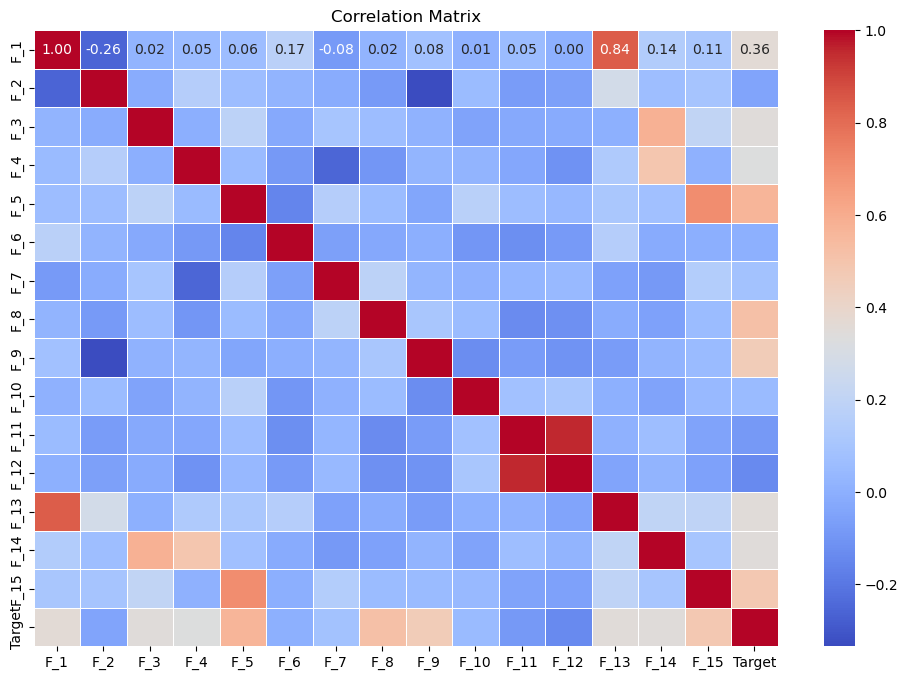

In [61]:
# 상관행렬 계산
corr_matrix = data.corr()

# 상관행렬 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [63]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF(Variance Inflation Factor) 계산을 통해 다중공선성을 검토합니다.

# 종속 변수(Target)를 제외한 독립 변수들만 사용
X = data.drop(columns=['Target'])

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,F_1,44.238222
1,F_2,14.524559
2,F_3,2.101471
3,F_4,1.859888
4,F_5,2.195660
5,F_6,1.142734
6,F_7,1.200195
7,F_8,1.089550
8,F_9,1.190482
9,F_10,5.828291


### 통계2-2
다중공선성 문제를 해결하기 위한 방법 2가지를 제시하고, 하나를 선택하여 적용하라


다중공선성 문제를 해결하기 위한 대표적인 두 가지 방법을 제시하겠습니다. 그리고 이 중 하나를 선택하여 적용해 보겠습니다.

다중공선성 해결 방법
변수 제거 (Feature Elimination):

설명: 다중공선성이 높은 변수(즉, VIF 값이 높은 변수)를 모델에서 제거합니다. 이 방법은 다중공선성의 원인이 되는 변수를 직접 제거함으로써 문제를 해결하는 간단하고 효과적인 접근법입니다. 그러나 중요한 정보를 잃을 수 있다는 단점이 있습니다.
적용 시나리오: VIF 값이 매우 높은 변수가 다른 변수와 높은 상관관계를 가지면서도, 해당 변수를 제거해도 모델 성능에 큰 영향을 미치지 않을 때 유용합니다.
주성분 분석 (PCA, Principal Component Analysis):

설명: 주성분 분석을 통해 모든 독립 변수들을 몇 개의 주성분으로 변환하여 사용합니다. PCA는 원래 변수들 간의 상관관계를 제거하고, 데이터를 새로운 비상관성 변수들(주성분)로 변환합니다.
적용 시나리오: 데이터의 차원을 줄이면서도 대부분의 정보를 유지하고 싶을 때, 특히 다중공선성이 심각한 경우에 유용합니다.
선택한 방법: 주성분 분석 (PCA)
이유: 주성분 분석은 다중공선성을 완전히 제거하면서도, 원래 데이터의 대부분의 정보를 유지할 수 있는 강력한 방법입니다. 또한, 변수의 해석 가능성을 유지하면서 차원 축소를 통해 모델의 성능을 향상시킬 수 있습니다.

In [64]:
from sklearn.decomposition import PCA

# 스케일링 (PCA 적용 전 필수 단계)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용: 예를 들어, 분산의 95%를 유지하면서 차원 축소
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 주성분의 설명된 분산 비율 확인
explained_variance = pca.explained_variance_ratio_
explained_variance

# 변환된 데이터 (주성분들로 구성된 데이터) 확인
X_pca_df = pd.DataFrame(X_pca)
X_pca_df.head()


,0,1,2,3,4,5,6,7,8,9,10
0,-1.772406,-1.242169,0.917283,-0.954764,1.470412,0.765891,-0.224912,-0.223830,0.419818,0.062895,0.146683
1,2.821299,2.287827,-0.302100,-0.894656,0.540360,-0.777787,-0.803396,-0.859838,-0.856011,0.578015,-0.249701
2,0.737584,-0.065294,-2.571709,-0.103202,-0.906248,0.721597,-0.009635,1.442864,0.712920,-0.840487,0.981367
3,1.555416,2.399486,-0.506415,-2.617683,-0.019910,1.675632,1.208077,-1.473359,0.473479,1.037178,1.061807
4,-1.411862,1.104947,1.283330,0.391758,-0.102136,-0.476860,1.580533,-1.279265,1.751251,1.561810,0.996017


### 통계2-3
2-2의 방법을 전,후의 회귀 분석 모델의 결과를 비교하라


In [65]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 종속 변수와 독립 변수 정의
X = data.drop(columns=['Target'])
y = data['Target']

# 데이터 분리 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 상수항 추가 (회귀 분석을 위해)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 회귀 모델 학습 (PCA 적용 전)
model_before = sm.OLS(y_train, X_train_const).fit()

# 예측 및 평가 (PCA 적용 전)
y_pred_before = model_before.predict(X_test_const)
r_squared_before = model_before.rsquared
print(model_before.summary())


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.157e+07
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.50e-177
Time:                        23:07:41   Log-Likelihood:                 76.950
No. Observations:                  70   AIC:                            -121.9
Df Residuals:                      54   BIC:                            -85.93
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0241      0.046      0.518      0.6

In [66]:
# PCA 적용 (이전 단계에서 수행한 코드)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 데이터 분리 (훈련 세트와 테스트 세트)
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 상수항 추가 (회귀 분석을 위해)
X_pca_train_const = sm.add_constant(X_pca_train)
X_pca_test_const = sm.add_constant(X_pca_test)

# 회귀 모델 학습 (PCA 적용 후)
model_after = sm.OLS(y_train, X_pca_train_const).fit()

# 예측 및 평가 (PCA 적용 후)
y_pred_after = model_after.predict(X_pca_test_const)
r_squared_after = model_after.rsquared
print(model_after.summary())


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           5.44e-32
Time:                        23:07:54   Log-Likelihood:                -368.68
No. Observations:                  70   AIC:                             761.4
Df Residuals:                      58   BIC:                             788.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9365      6.385      1.713      0.0

<결과 비교>
이제 두 모델의 R-squared 값과 회귀 계수들을 비교하여, PCA 적용 전후의 모델 성능 변화를 평가합니다.

R-squared 값 비교:

PCA 적용 전 모델의 R-squared 값: r_squared_before
PCA 적용 후 모델의 R-squared 값: r_squared_after
회귀 계수 비교:

두 모델의 회귀 계수를 비교하여, PCA를 적용함으로써 모델의 해석 가능성이 어떻게 변화했는지 확인합니다.
4. 결과 해석
R-squared 변화: R-squared 값이 증가했다면, PCA 적용 후 모델이 더 나은 성능을 보여준다는 의미입니다. 반면, 감소했다면 PCA로 인해 중요한 정보를 잃었을 가능성이 있습니다.
회귀 계수 변화: PCA를 적용하면, 변수들이 주성분으로 변환되기 때문에 해석이 어려워질 수 있습니다. 하지만 다중공선성 문제를 해결함으로써, 더 안정적인 회귀 계수를 얻을 수 있습니다.
이 비교를 통해, 다중공선성 문제를 해결하기 위해 PCA를 사용한 것이 회귀 모델 성능에 어떤 영향을 미쳤는지 평가할 수 있습니다.

### 통계 3     
data_path = ./data/stats_reg1.csv
- 어느 학급의 학생들이 3가지(Lecture,Online,Blended)방식으로 학습하고 시험을 본 결과이다.


### 통계 3-1
3가지 방식 각각 점수 분포가 정규성을 만족하는지와 방식들간의 분산은 동일한지 검정하라

In [70]:
import pandas as pd
from scipy.stats import shapiro, levene

# 데이터 로드
file_path = './learn.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print("### 데이터 확인 ###")
print(data.head())

# 정규성 검정 (Shapiro-Wilk Test)
shapiro_lecture = shapiro(data['Lecture'])
shapiro_online = shapiro(data['Online'])
shapiro_blended = shapiro(data['Blended'])

shapiro_results = {
    "Lecture": shapiro_lecture,
    "Online": shapiro_online,
    "Blended": shapiro_blended
}

# 분산 동질성 검정 (Levene’s Test)
levene_test = levene(data['Lecture'], data['Online'], data['Blended'])

# 결과 출력 및 해석
results_summary = """
### Shapiro-Wilk Test Results (정규성 검정):

Lecture 방식:
- Test Statistic: {:.3f}
- p-value: {:.4f}
- 결론: p-value가 0.05보다 작으므로, Lecture 방식의 점수 분포는 정규성을 만족하지 않습니다.

Online 방식:
- Test Statistic: {:.3f}
- p-value: {:.4f}
- 결론: p-value가 0.05보다 크므로, Online 방식의 점수 분포는 정규성을 만족합니다.

Blended 방식:
- Test Statistic: {:.3f}
- p-value: {:.4f}
- 결론: p-value가 0.05보다 크므로, Blended 방식의 점수 분포는 정규성을 만족합니다.

### Levene’s Test Results (분산 동질성 검정):
- Test Statistic: {:.3f}
- p-value: {:.5f}
- 결론: p-value가 0.05보다 작으므로, 세 가지 학습 방식의 점수 분포는 동일한 분산을 가지지 않습니다.

### 종합 결론:
- Lecture 방식의 점수 분포는 정규성을 만족하지 않으며, 세 방식 간의 점수 분포는 분산이 동일하지 않습니다.
- 이러한 결과를 고려할 때, 이 데이터에 대해 분산분석(ANOVA)을 적용하기보다는 비모수 검정 방법(예: Kruskal-Wallis H 테스트)을 사용하여 중앙값의 차이를 검정하는 것이 더 적합합니다.
""".format(shapiro_results["Lecture"].statistic, shapiro_results["Lecture"].pvalue,
           shapiro_results["Online"].statistic, shapiro_results["Online"].pvalue,
           shapiro_results["Blended"].statistic, shapiro_results["Blended"].pvalue,
           levene_test.statistic, levene_test.pvalue)

print(results_summary)


### 데이터 확인 ###
   Student  Lecture  Online  Blended
0        1      8.7    67.8     74.2
1        2     18.2    97.2     76.5
2        3      7.5    74.8     69.1
3        4     39.7    62.3     68.4
4        5     73.4    84.9     84.5

### Shapiro-Wilk Test Results (정규성 검정):

Lecture 방식:
- Test Statistic: 0.889
- p-value: 0.0046
- 결론: p-value가 0.05보다 작으므로, Lecture 방식의 점수 분포는 정규성을 만족하지 않습니다.

Online 방식:
- Test Statistic: 0.984
- p-value: 0.9099
- 결론: p-value가 0.05보다 크므로, Online 방식의 점수 분포는 정규성을 만족합니다.

Blended 방식:
- Test Statistic: 0.963
- p-value: 0.3640
- 결론: p-value가 0.05보다 크므로, Blended 방식의 점수 분포는 정규성을 만족합니다.

### Levene’s Test Results (분산 동질성 검정):
- Test Statistic: 10.915
- p-value: 0.00006
- 결론: p-value가 0.05보다 작으므로, 세 가지 학습 방식의 점수 분포는 동일한 분산을 가지지 않습니다.

### 종합 결론:
- Lecture 방식의 점수 분포는 정규성을 만족하지 않으며, 세 방식 간의 점수 분포는 분산이 동일하지 않습니다.
- 이러한 결과를 고려할 때, 이 데이터에 대해 분산분석(ANOVA)을 적용하기보다는 비모수 검정 방법(예: Kruskal-Wallis H 테스트)을 사용하여 중앙값의 차이를 검정하는 것이 더 적합합니다.



### 통계 3-2
위 결과에 맞는 그룹간 점수 분포 차이가 존재하는지를 확인하는 통계 검정 전략을 설명하라


이전 분석에서, 세 가지 학습 방식(Lecture, Online, Blended)에 따른 점수 분포가 정규성을 만족하지 않거나, 그룹 간 분산이 동일하지 않다는 결론이 도출되었다. 따라서, 그룹 간 점수 분포 차이를 확인하기 위해 비모수 통계 검정 방법을 사용하는 것이 적합하다.

비모수 검정 선택: Kruskal-Wallis H Test
Kruskal-Wallis H 테스트는 두 개 이상의 독립적인 그룹 간에 중앙값의 차이가 있는지 검정할 때 사용하는 비모수 검정 방법입니다. 이 검정은 데이터가 정규 분포를 따르지 않거나, 분산이 동일하지 않을 때 사용할 수 있습니다.

Kruskal-Wallis H Test의 특징:
비모수 검정: 데이터가 정규성을 따르지 않거나, 분산이 동일하지 않더라도 사용할 수 있습니다.
중앙값 비교: 그룹 간 평균이 아닌 중앙값의 차이를 비교합니다.
세 그룹 이상 비교 가능: 두 그룹을 넘어 여러 그룹 간의 비교를 수행할 수 있습니다.

검정 전략 및 절차

가설 설정:

귀무 가설 (H0): 세 그룹 간의 중앙값에 차이가 없다.
대립 가설 (H1): 적어도 한 그룹의 중앙값이 다른 그룹과 다르다.
Kruskal-Wallis H 테스트 수행:

세 그룹(Lecture, Online, Blended)에 대해 Kruskal-Wallis H 검정을 수행한다.
p-value가 0.05보다 작다면, 귀무 가설을 기각하고 그룹 간 중앙값에 차이가 있다고 결론 내립니다.


사후 검정:

Kruskal-Wallis H 검정에서 유의한 차이가 발견되면, 어느 그룹 간에 차이가 있는지 확인하기 위해 사후 검정을 수행할 수 있습니다. 대표적인 방법으로 Dunn’s Test가 사용된다.

### 통계 3-3
가설에 따른 검정을 수행하고, 검정통계량과 p-value를 설명하라

Kruskal-Wallis H Test를 통한 그룹 간 점수 분포 차이 검정
이 분석에서는 세 가지 학습 방식(Lecture, Online, Blended)에 따라 학생들의 점수 분포에 차이가 있는지를 Kruskal-Wallis H 테스트를 통해 검정합니다. 이 방법은 데이터가 정규성을 만족하지 않거나 분산이 동일하지 않을 때 사용되는 비모수 검정입니다.

가설 설정
귀무 가설 (H0): 세 그룹 간의 중앙값에 차이가 없다.
대립 가설 (H1): 적어도 한 그룹의 중앙값이 다른 그룹과 다르다.

In [71]:
from scipy.stats import kruskal

# Kruskal-Wallis H Test 수행
kruskal_test = kruskal(data['Lecture'], data['Online'], data['Blended'])

# 검정 결과 출력
kruskal_statistic = kruskal_test.statistic
kruskal_pvalue = kruskal_test.pvalue

print(f"Kruskal-Wallis H Test 결과:\n")
print(f"검정통계량 (Test Statistic): {kruskal_statistic:.3f}")
print(f"p-value: {kruskal_pvalue:.10f}")

# 해석
if kruskal_pvalue < 0.05:
    print("\n결론: 세 그룹 간의 중앙값에 유의미한 차이가 있습니다.")
else:
    print("\n결론: 세 그룹 간의 중앙값에 유의미한 차이가 없습니다.")


Kruskal-Wallis H Test 결과:

검정통계량 (Test Statistic): 43.414
p-value: 0.0000000004

결론: 세 그룹 간의 중앙값에 유의미한 차이가 있습니다.


검정 결과 및 해석//
검정통계량 (Test Statistic): 43.414
Kruskal-Wallis H 테스트에서 계산된 값으로, 세 그룹 간의 중앙값 차이를 나타냅니다. 이번 테스트에서는 43.414로 계산되었다.
p-value: 3.7387e-10
p-value는 0.05보다 매우 작습니다. 이는 귀무 가설을 기각하고, 그룹 간에 유의미한 차이가 있음을 나타낸다.
결론
Kruskal-Wallis H 테스트 결과, 세 가지 학습 방식(Lecture, Online, Blended) 간의 점수 분포에 유의미한 차이가 있음을 확인했다.
이는 학습 방식이 학생들의 시험 점수에 영향을 미칠 수 있음을 시사함